#  Project

**Project Goal:** 

**Dataset Period:**

**Methodology:** 

---

## 1. Business Understanding

### 1.1 Business Objectives
TODO

### 1.2 Project Goals and Successs Criteria
TODO


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math

---
## 2. Data Understanding

### 2.1 Data Collection

The first step is to load the datasets into the working environment. This involves importing the necessary libraries and reading the data file into a suitable data structure, namely, a DataFrame using Pandas.

In [2]:
# Load datasets
weather = pd.read_csv("weather.csv", parse_dates=["time"])
energy = pd.read_csv("energy_dataset.csv", parse_dates=["time"])

# Set 'time' as index
weather = weather.set_index("time")
energy = energy.set_index("time")

### 2.2 Data Description

##### Basic dataset information

In [3]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 24 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation_biomass                           35045 non-null  float64
 1   generation_fossil_brown_coal_lignite         35046 non-null  float64
 2   generation_fossil_coal-derived_gas           35046 non-null  float64
 3   generation_fossil_gas                        35046 non-null  float64
 4   generation_fossil_hard_coal                  35046 non-null  float64
 5   generation_fossil_oil                        35045 non-null  float64
 6   generation_fossil_oil_shale                  35046 non-null  float64
 7   generation_fossil_peat                       35046 non-null  float64
 8   generation_geothermal                        35046 non-null  float64
 9   generation_hydro_pumped_storage_a

The *energy* dataset contains 35064 entries and 24 features, representing hourly records of electricity generation from various sources, total system load, and the day-ahead market price. Each row corresponds to one hour of energy system operation, and the goal is to forecast the electricity price one hour and one day ahead.

In [4]:
energy.describe()

,generation_biomass,generation_fossil_brown_coal_lignite,generation_fossil_coal-derived_gas,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_fossil_oil_shale,generation_fossil_peat,generation_geothermal,generation_hydro_pumped_storage_aggregated,...,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_offshore,generation_wind_onshore,forecast_wind_offshore_eday_ahead,total_load_actual,price_day_ahead
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35047.000000,35046.000000,35046.000000,35046.000000,35045.000000,35046.0,35046.000000,0.0,35028.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,6263.907039,60.228585,85.639702,1432.665925,269.452133,0.0,5464.479769,NaN,28696.939905,49.874341
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,839.667958,20.238381,14.077554,1680.119887,50.195536,0.0,3213.691587,NaN,4574.987950,14.618900
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,18041.000000,2.060000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,5760.000000,53.000000,73.000000,71.000000,240.000000,0.0,2933.000000,NaN,24807.750000,41.490000
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,6566.000000,57.000000,88.000000,616.000000,279.000000,0.0,4849.000000,NaN,28901.000000,50.520000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,7025.000000,80.000000,97.000000,2578.000000,310.000000,0.0,7398.000000,NaN,32192.000000,60.530000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,7117.000000,106.000000,119.000000,5792.000000,357.000000,0.0,17436.000000,NaN,41015.000000,101.990000


In [5]:
energy.head()

,generation_biomass,generation_fossil_brown_coal_lignite,generation_fossil_coal-derived_gas,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_fossil_oil_shale,generation_fossil_peat,generation_geothermal,generation_hydro_pumped_storage_aggregated,...,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_offshore,generation_wind_onshore,forecast_wind_offshore_eday_ahead,total_load_actual,price_day_ahead
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,...,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,NaN,25385.0,50.10
2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,...,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,NaN,24382.0,48.10
2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,...,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,NaN,22734.0,47.33
2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,...,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,NaN,21286.0,42.27
2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,...,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,NaN,20264.0,38.41


In [6]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  35064 non-null  float64
 1   pressure     35064 non-null  float64
 2   humidity     35064 non-null  float64
 3   wind_speed   35064 non-null  float64
dtypes: float64(4)
memory usage: 1.3+ MB


The *weather* dataset also contains 35064 entries and 5 features representing hourly meteorological measurements such as temperature, pressure, humidity, and wind speed. Each row corresponds to one hour of weather conditions, and these variables are used as exogenous inputs to improve electricity price forecasting.

In [7]:
weather.describe()

,temperature,pressure,humidity,wind_speed
count,35064.000000,35064.000000,35064.000000,35064.000000
mean,289.706862,1017.297872,68.033025,2.442944
std,7.251796,6.363845,14.814871,1.276415
min,272.006000,999.500000,22.600000,0.000000
25%,284.098877,1013.475000,56.750000,1.400000
50%,289.036200,1017.000000,69.600000,2.200000
75%,295.100500,1021.000000,80.000000,3.200000
max,309.048000,1035.500000,100.000000,8.500000


In [8]:
weather.head()

,temperature,pressure,humidity,wind_speed
time,,,,
2015-01-01 00:00:00+01:00,272.491463,1021.3,82.4,2.0
2015-01-01 01:00:00+01:00,272.512700,1021.2,82.4,2.0
2015-01-01 02:00:00+01:00,272.151937,1021.6,82.0,2.4
2015-01-01 03:00:00+01:00,272.142269,1021.5,82.0,2.4
2015-01-01 04:00:00+01:00,272.198700,1021.5,82.0,2.4


### 2.3 Data Exploration

#### 2.3.1 Target variable analysis

The target variable `price_day_ahead` represents the eletricity market price for the upcoming hour.

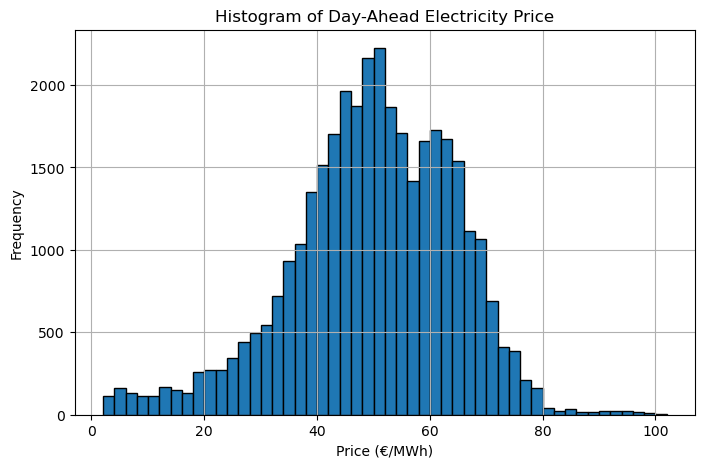

In [9]:
plt.figure(figsize=(8,5))
plt.hist(energy['price_day_ahead'], bins=50, edgecolor='black')
plt.title("Histogram of Day-Ahead Electricity Price")
plt.xlabel("Price (€/MWh)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

The histogram shows a distribution that is very close to a normal distribution, although it is slightly right-skewed.

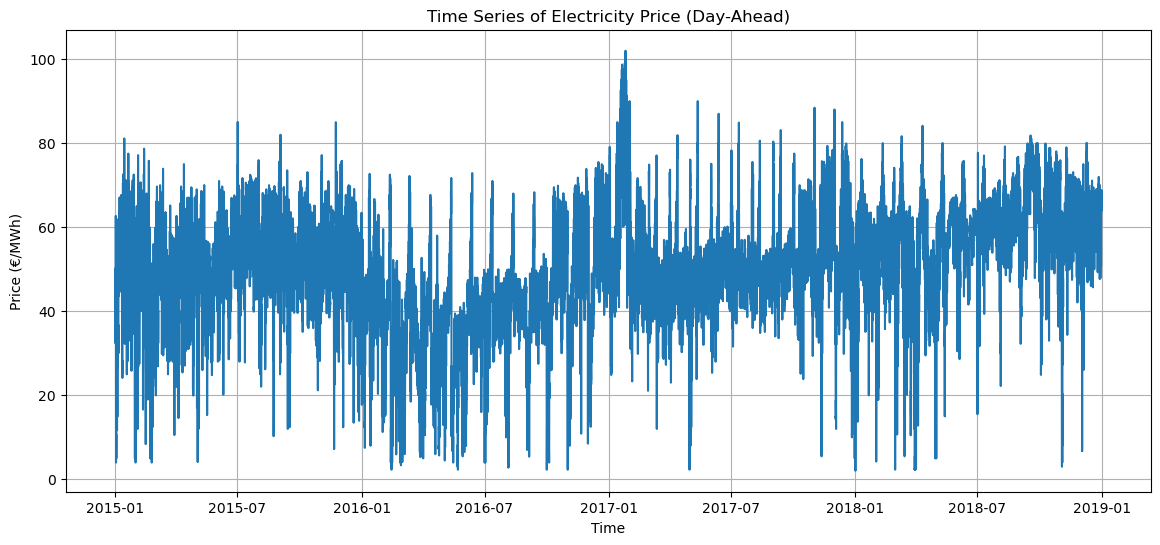

In [10]:
plt.figure(figsize=(14, 6))
plt.plot(energy['price_day_ahead'])
plt.title("Time Series of Electricity Price (Day-Ahead)")
plt.xlabel("Time")
plt.ylabel("Price (€/MWh)")
plt.grid(True)
plt.show()

The time series plot shows strong short-term fluctuations and clear seasonal patterns, with occasional price spikes. Prices vary over time, indicating non-stationarity and the presence of both volatility and periodic behavior.

#### 2.3.2 Feature distribution analysis

Now we will perform feature distribution analysis to examine how the data values are spread across the datasets. We will use plots and histograms to visualise the distributions features. Box plots for will be skipped in this step, as they will be specifically used for outlier detection in paragraph `2.4.2`.

In [11]:
def feat_distribution(nonDiscreteFeatures, df):
    nrows = math.ceil(len(nonDiscreteFeatures) / 2)
    ncols = 2
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, nrows * 5))
    axes = axes.flatten()

    for i, col in enumerate(nonDiscreteFeatures):
        df[col].hist(bins=30, ax=axes[i])
        axes[i].set_title(f'{col} Distribution')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    plt.show()

All of the features are numerical and continuous.

##### Energy dataset

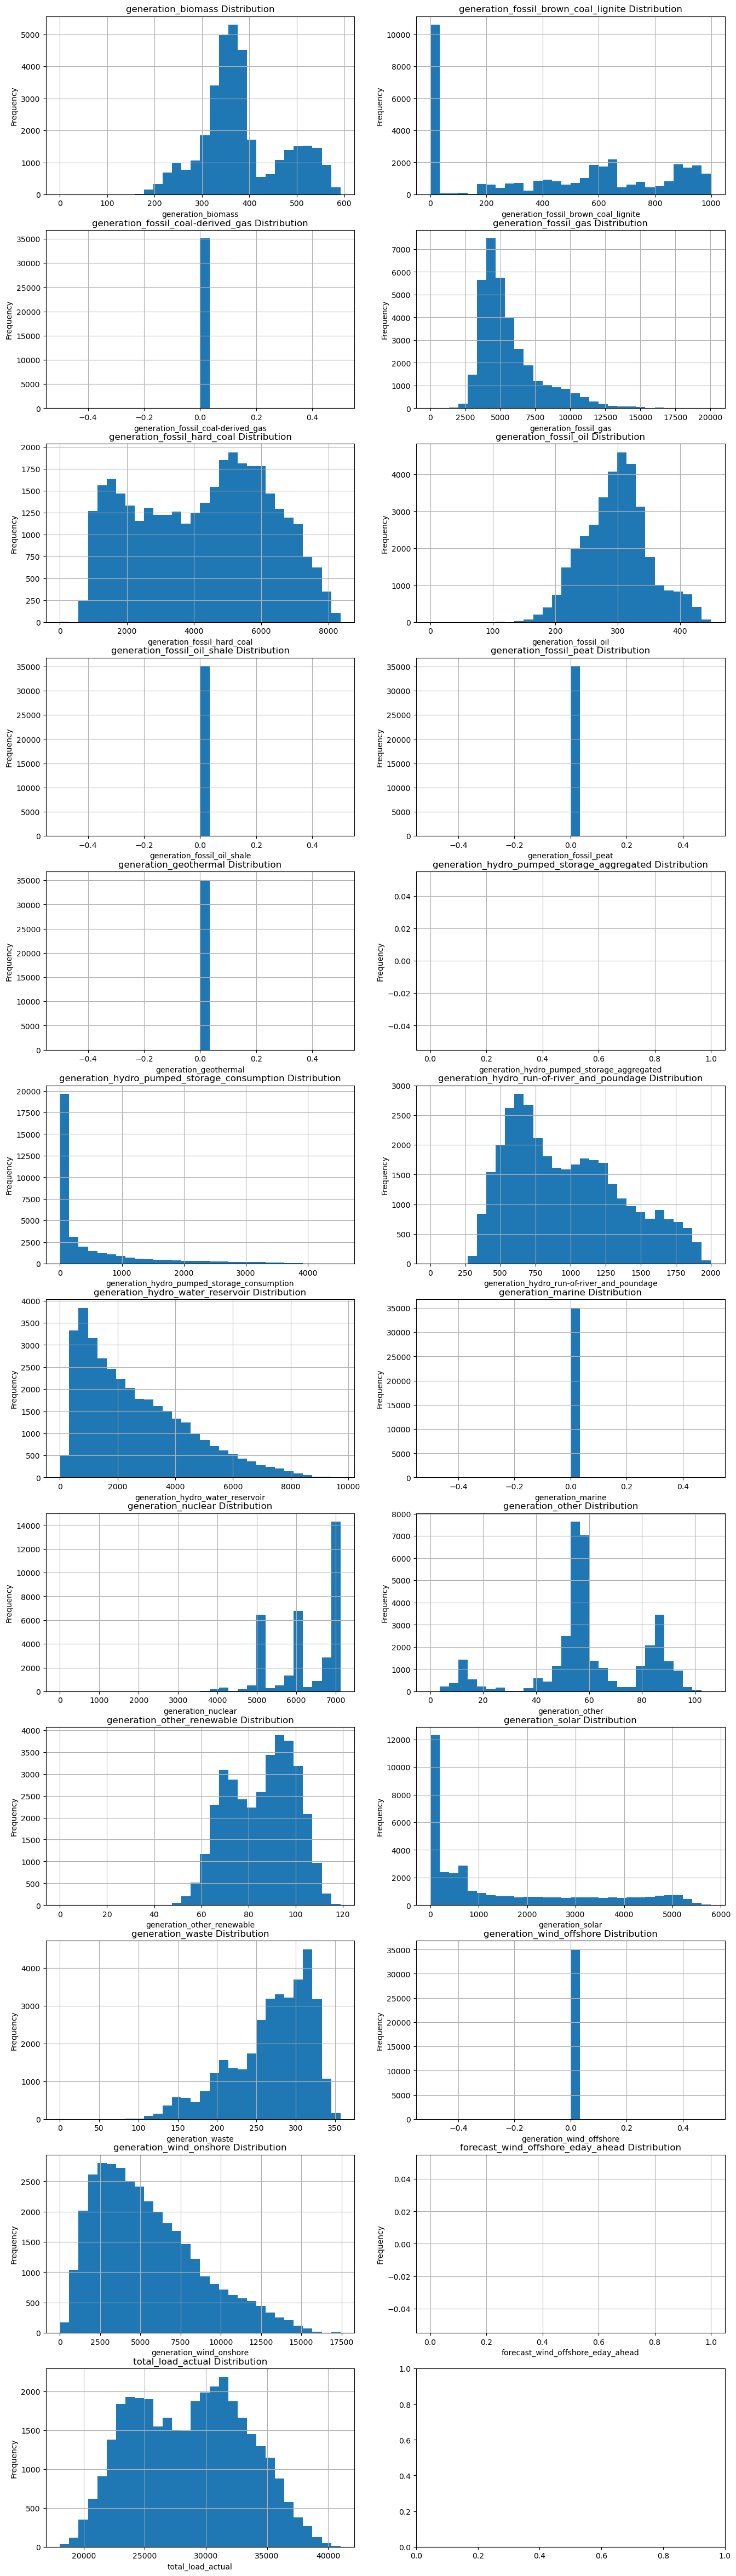

In [12]:
energy_features = [col for col in energy.columns 
                   if col not in ['time', 'price_day_ahead']]
feat_distribution(energy_features, energy)

TODO - INTERPRETATION

##### Weather dataset

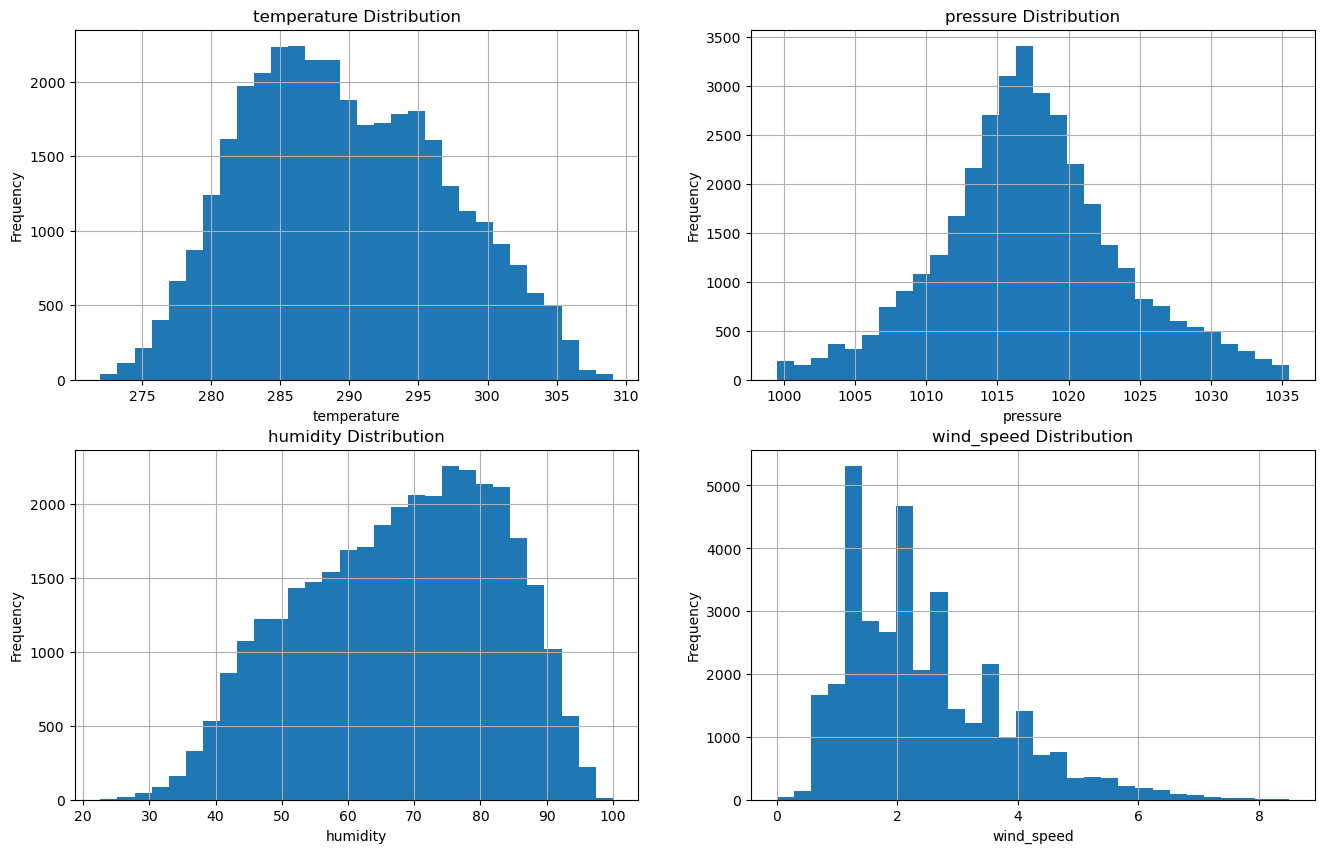

In [13]:
weather_features = [col for col in weather.columns if col != 'time']
feat_distribution(weather_features, weather)

TODO - INTEPRETATION

TODO:
-  eletricity and temp relation
- day of the week when the cost is higher
- correlated variables

### 2.4 Data Quality Assessment

#### 2.4.1 Identify missing values

In [14]:
# % missing values by column

def missing_values_info(df):
    nulls = df.isnull().sum()
    percent = round(nulls / df.shape[0] * 100, 3)
    
    nullvalues = pd.concat([nulls, percent], axis=1)
    nullvalues.columns = ["Count", "%"]
    
    return nullvalues


In [15]:
missing_values_info(energy)

,Count,%
generation_biomass,19,0.054
generation_fossil_brown_coal_lignite,18,0.051
generation_fossil_coal-derived_gas,18,0.051
generation_fossil_gas,18,0.051
generation_fossil_hard_coal,18,0.051
generation_fossil_oil,19,0.054
generation_fossil_oil_shale,18,0.051
generation_fossil_peat,18,0.051
generation_geothermal,18,0.051
generation_hydro_pumped_storage_aggregated,35064,100.000


TODO - INTERPRETATION

In [21]:
# skipping the NaNs
energy_features = [
    f for f in energy_features
    if energy[f].notna().sum() > 0
]

In [16]:
missing_values_info(weather)

,Count,%
temperature,0,0.0
pressure,0,0.0
humidity,0,0.0
wind_speed,0,0.0


TODO - INTERPRETATION

#### 2.4.2 Identify outliers

##### 2.4.2.1 Target variable

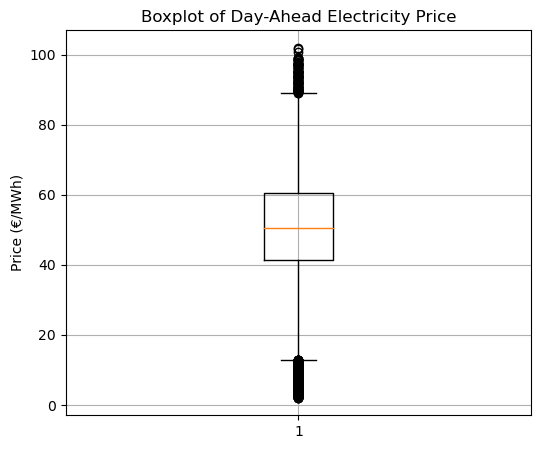

In [17]:
plt.figure(figsize=(6,5))
plt.boxplot(energy['price_day_ahead'], vert=True)
plt.title("Boxplot of Day-Ahead Electricity Price")
plt.ylabel("Price (€/MWh)")
plt.grid(True)
plt.show()

TODO - INTERPRETATION

##### 2.4.2.2 Energy features

In [22]:
def boxplots(numeric_features, df):
    num_plots = len(numeric_features)
    cols = 2
    rows = math.ceil(num_plots / cols)

    plt.figure(figsize=(cols * 5, rows * 4))

    for i, feature in enumerate(numeric_features):
        plt.subplot(rows, cols, i + 1)
        sns.boxplot(y=df[feature])
        plt.title(f"Boxplot: {feature}")

    plt.tight_layout()
    plt.show()


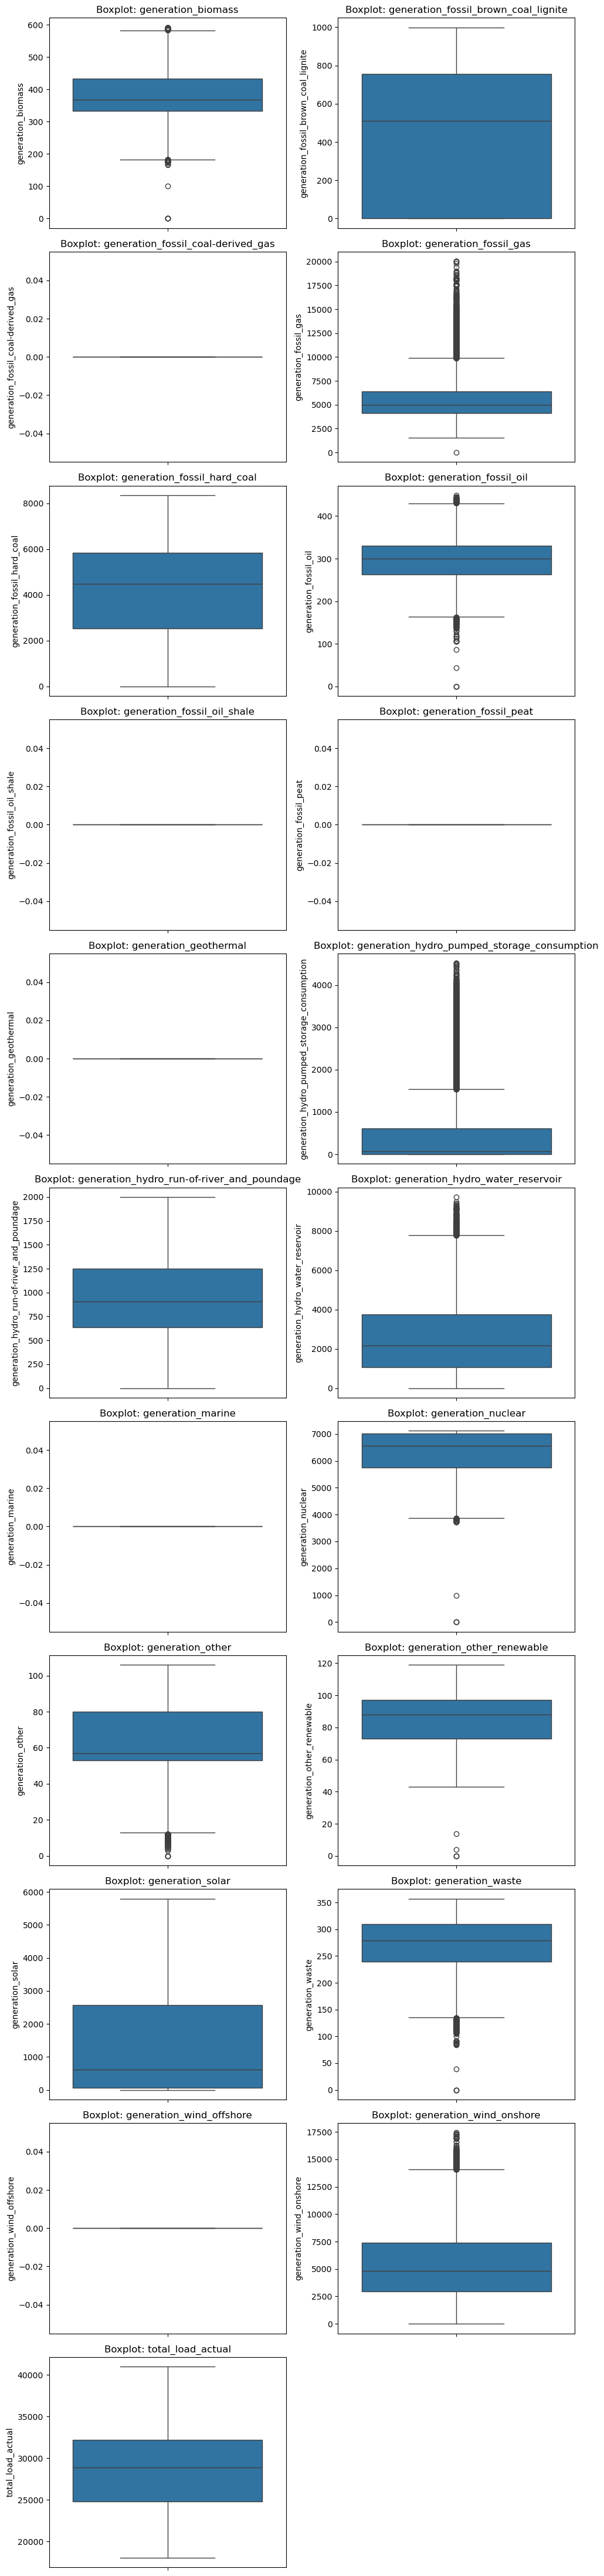

In [23]:
boxplots(energy_features, energy)

TODO - INTERPRETATION

##### 2.4.2.3 Weather features

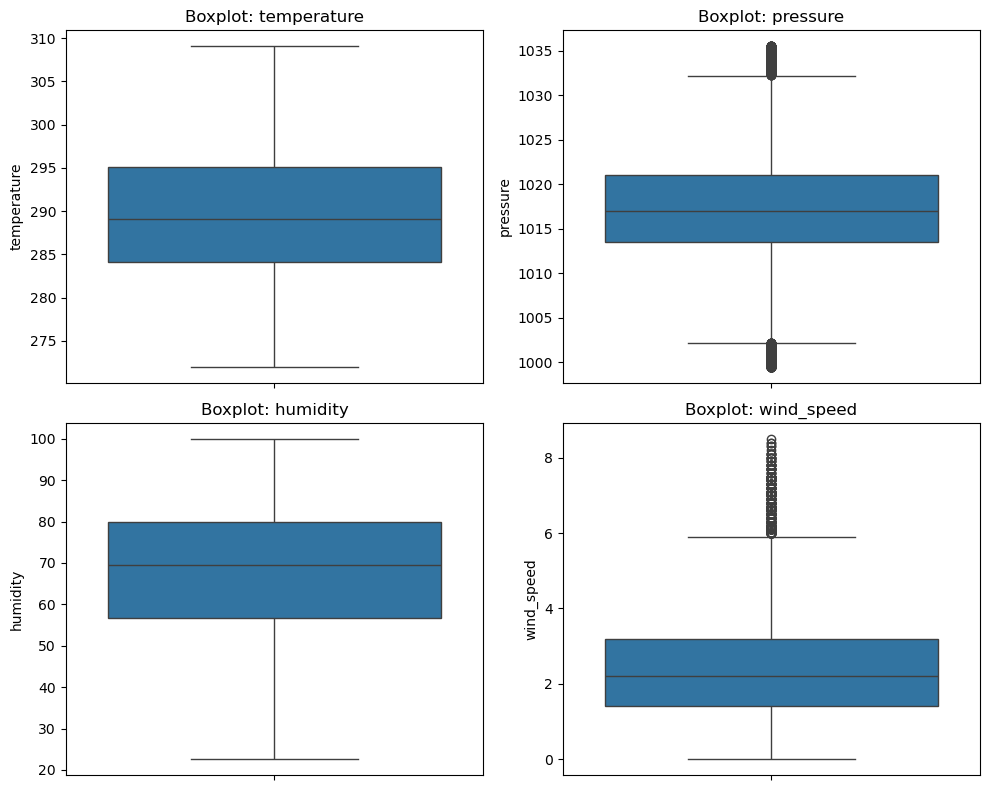

In [25]:
boxplots(weather_features, weather)

TODO - INTERPRETATION

#### 2.4.3 Check data duplication

In [26]:
energy.duplicated().sum()

1

In [27]:
weather.duplicated().sum()

592

---
## 3. Data Preparation

### 3.1 Data Cleaning

#### 3.1.1 Missing values

#### 3.1.2 Duplicates Deletion

#### 3.1.3 Outliers Removal

### 3.2 Bivariate analysis

### 3.3 Data Transformation

### 3.4 Data Splitting

---
## 4. Modelling

### 4.1 Statistical Models

### 4.2 Machine Learning Models

### 4.3 Deep Learning Models